# 기본 실습 문제

In [ ]:
import numpy as np

In [ ]:
import numpy as np

raw_data_link = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/x09.txt'
raw_data = np.genfromtxt(raw_data_link, skip_header=36)
raw_data

array([[  1.,   1.,  84.,  46., 354.],
       [  2.,   1.,  73.,  20., 190.],
       [  3.,   1.,  65.,  52., 405.],
       [  4.,   1.,  70.,  30., 263.],
       [  5.,   1.,  76.,  57., 451.],
       [  6.,   1.,  69.,  25., 302.],
       [  7.,   1.,  63.,  28., 288.],
       [  8.,   1.,  72.,  36., 385.],
       [  9.,   1.,  79.,  57., 402.],
       [ 10.,   1.,  75.,  44., 365.],
       [ 11.,   1.,  27.,  24., 209.],
       [ 12.,   1.,  89.,  31., 290.],
       [ 13.,   1.,  65.,  52., 346.],
       [ 14.,   1.,  57.,  23., 254.],
       [ 15.,   1.,  59.,  60., 395.],
       [ 16.,   1.,  69.,  48., 434.],
       [ 17.,   1.,  60.,  34., 220.],
       [ 18.,   1.,  79.,  51., 374.],
       [ 19.,   1.,  75.,  50., 308.],
       [ 20.,   1.,  82.,  34., 220.],
       [ 21.,   1.,  59.,  46., 311.],
       [ 22.,   1.,  67.,  23., 181.],
       [ 23.,   1.,  85.,  37., 274.],
       [ 24.,   1.,  55.,  40., 303.],
       [ 25.,   1.,  63.,  30., 244.]])

1열은 인덱스, 2열의 1들은 구분선 표시, 3열 ~ 5열까지가 실제로 들어있는 데이터이다.

In [ ]:
import matplotlib.pyplot as plt

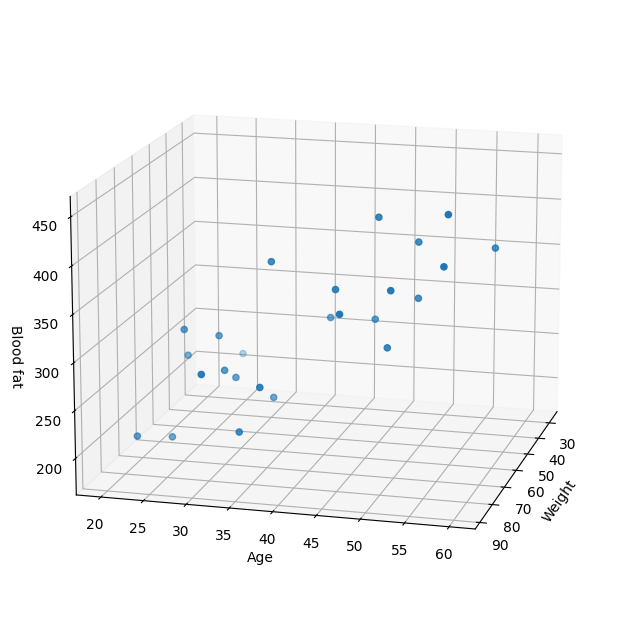

In [ ]:
# 어떻게 생겼을까?
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

xs = np.array(raw_data[:,2], dtype = np.float32)
ys = np.array(raw_data[:,3], dtype = np.float32)
zs = np.array(raw_data[:,4], dtype = np.float32)

fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs, ys, zs)
ax.set_xlabel('Weight')
ax.set_ylabel('Age')
ax.set_zlabel('Blood fat')
ax.view_init(15, 15)
plt.show()

현재 raw_data에서 얻고자 하는 것은 Age, Weight 값을 주었을 때 Blood fat을 예측하는 것이다.

Linear Regression 모델로 이를 풀어보자.

In [ ]:
# Train
x_data = np.array(raw_data[:, 2:4], dtype = np.float32)
y_data = np.array(raw_data[:,4], dtype = np.float32) # (25, )

y_data = y_data.reshape((25, 1)) # (25, )은 numpy 연산이 되지 않으므로 (25, 1)로 reshape
x_data.shape, y_data.shape

((25, 2), (25, 1))

In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow as tf

In [ ]:
# 모델링
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1, input_shape = (2, )), # 얻고자 하는 입력 shape이 2개, bias 1개 # weight가 2개 bias가 1개라는걸 모델이 자동으로 알게 된다
])
model.compile(optimizer = 'rmsprop', loss = 'mse')
# mse를 기준으로 최적화하는 가중치 반환
# 최적화는 gradient descent 등을 사용
#loss function = mse
# optimizer =loss 를 최소화 하는 함수

- loss 함수

학습을 위해서 정해주어야하는 함수로, 정답까지 얼마나 멀리 있는지를 측정할 수 있는 함수이다. loss 함수를 설정하고 optimizer를 설정하는 방식인데, optimizer는 loss를 어떻게 줄일 것인지를 결정하는 방법을 선택하는 것이다

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
Total params: 3 (12.00 Byte)
Trainable params: 3 (12.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


weight 2개와 bias 1개 총 3개의 param을 찾아야함을 알려주고 있다.

위 과정은 모델을 구성(네트워크, loss, optimizer 설정)한 것이고 이제 학습을 해야한다

In [ ]:
# 학습
hist = model.fit(x_data, y_data, epochs=5000) # epochs = 전체 데이터를 이용해 학습하는 횟수

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
1/1 [==============================] - 0s 20ms/step - loss: 16694.2852
Epoch 2502/5000
1/1 [==============================] - 0s 29ms/step - loss: 16668.3203
Epoch 2503/5000
1/1 [==============================] - 0s 23ms/step - loss: 16642.3770
Epoch 2504/5000
1/1 [==============================] - 0s 13ms/step - loss: 16616.4570
Epoch 2505/5000
1/1 [==============================] - 0s 31ms/step - loss: 16590.5645
Epoch 2506/5000
1/1 [==============================] - 0s 22ms/step - loss: 16564.6934
Epoch 2507/5000
1/1 [==============================] - 0s 28ms/step - loss: 16538.8457
Epoch 2508/5000
1/1 [==============================] - 0s 14ms/step - loss: 16513.0215
Epoch 2509/5000
1/1 [==============================] - 0s 26ms/step - loss: 16487.2246
Epoch 2510/5000
1/1 [==============================] - 0s 15ms/step - loss: 16461.4492
Epoch 2511/5000
1/1 [==============================] - 0s 27ms/step - loss: 16435.6973
Epoch 2512/5000
1/1 [==

epochs을 늘어날 수록 loss값이 떨어지는 것을 보고 있다.

Text(0.5, 1.0, 'Loss Value by epochs')

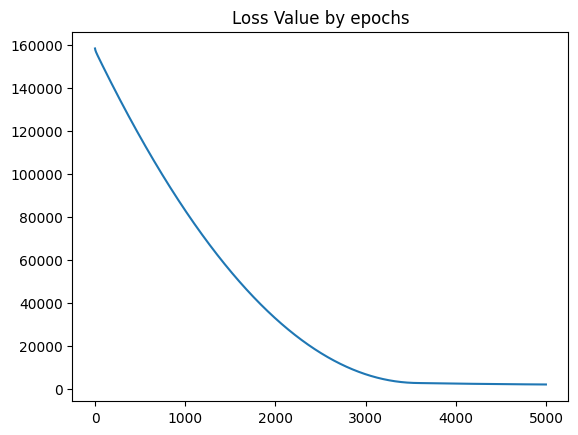

In [ ]:
plt.plot(hist.history['loss'])
plt.title('Loss Value by epochs')

한 3천번 정도까지만 했어도 충분해보인다!

이제 학습된 모델로 예측을 해보자.

In [ ]:
# age : 100, weight : 44
model.predict(np.array([100, 44]).reshape(1, 2))

1/1 [==============================] - 0s 292ms/step


array([[384.9082]], dtype=float32)

In [ ]:
# age : 60, weight : 25
model.predict(np.array([60, 25]).reshape(1, 2))

1/1 [==============================] - 0s 21ms/step


array([[226.29686]], dtype=float32)

학습된 모델의 가중치와 bias 확인도 가능하다

In [ ]:
W_, b_ = model.get_weights()
W_, b_

(array([[1.7147053],
        [4.7380595]], dtype=float32),
 array([4.9630547], dtype=float32))

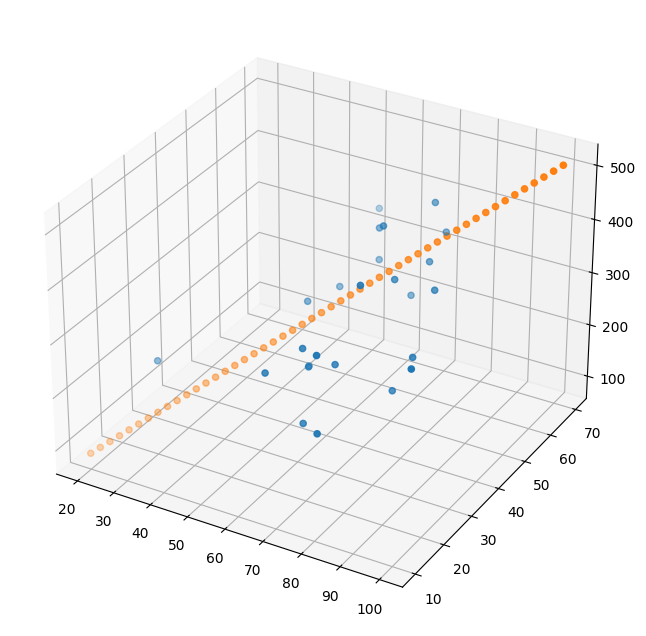

In [ ]:
# 구해진 모델의 시각화
x = np.linspace(20, 100, 50).reshape(50,1)
y = np.linspace(10, 70, 50).reshape(50, 1)
X = np.concatenate((x, y), axis = 1)
Z = np.matmul(X, W_) + b_

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs, ys, zs)
ax.scatter(x, y, Z)

기존의 데이터와 우리가 구한 모델(노란색 선)을 같이 시각화해볼 수도 있다.

# XOR 문제

(0, 0) -> 0 , (0, 1) -> 1 , (1, 0) -> 1 , (1, 1) -> 0을 반환하는 것이 XOR 문제이다.

따라서 직선 하나로 문제를 해결할 수 있었던 앞선 문제와는 달리 XOR 문제는 직선 하나로 해결할 수 없다. 즉, 뉴런 하나로 해당 문제를 해결할 수 없다는 뜻이기도 하다.

In [ ]:
# 데이터 준비
X = np.array([[0,0],
              [1,0],
              [0,1],
              [1,1]])
y = np.array([[0], [1], [1], [0]])

In [ ]:
# 모델링
model = tf.keras.Sequential([
    # 입력을 2개 받아 각각 출력한 다음
    tf.keras.layers.Dense(2, activation='sigmoid', input_shape = (2, )),
    # 출력된 결과를 하나로 모아줌
    tf.keras.layers.Dense(1, activation='sigmoid')

    # 이때 activation 함수로 sigmoid를 설정한 이유는
    # 비선형 함수를 같이 통과시켜 주는 데에 의의가 있다.
    # 디폴트 설정은 선형 함수(직선)이므로 이를 두 번 통과시키면 결국엔 선형 함수가 되어버려
    # 우리가 기존에 직선 하나로 해결할 수 없어 레이어를 2번 쌓은 효과가 사라진다.
    # 따라서 선형이 되지 않도록 activation 함수를 비선형 함수인 sigmoid를 설정해준 것이다.
])

In [ ]:
# 확률적으로 샘플링하여 학습시킨 후 계산하라는 코드
model.compile(optimizer=tf.keras.optimizers.SGD(lr = 0.1), loss = 'mse')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 2)                 6         
                                                                 
 dense_2 (Dense)             (None, 1)                 3         
                                                                 
Total params: 9 (36.00 Byte)
Trainable params: 9 (36.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# epochs : 지정된 횟수만큼 학습
# batch_size : 한 번의 학습에 사용될 데이터의 개수
hist = model.fit(X, y, epochs=5000, batch_size=1)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
4/4 [==============================] - 0s 4ms/step - loss: 0.2450
Epoch 2502/5000
4/4 [==============================] - 0s 5ms/step - loss: 0.2450
Epoch 2503/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.2450
Epoch 2504/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.2450
Epoch 2505/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.2450
Epoch 2506/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.2450
Epoch 2507/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.2450
Epoch 2508/5000
4/4 [==============================] - 0s 5ms/step - loss: 0.2450
Epoch 2509/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.2450
Epoch 2510/5000
4/4 [==============================] - 0s 5ms/step - loss: 0.2450
Epoch 2511/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.2450
Epoch 2512/5000
4/4 [==============================] - 0s 5ms/step - loss: 0.2

다음에 이야기할 소재이지만 언급만 해놓자면, 레이어가 2개 이상일 때 오차를 어떻게 계산하는지가 항상 의문이었다.

맨 마지막 단계에서는 실제값이 있으니 오차를 계산할 수 있지만, 중간 단계에서는 실제값이 없기 때문에 오차 계산이 어려웠던 것이다. 이후, "역전파"라는 개념이 등장하면서 이를 효과적으로 풀 수 있게 되었는데 이 이론은 다음 시간에 학습하도록 하자.

In [ ]:
# 학습 결과
model.predict(X)

1/1 [==============================] - 0s 293ms/step


array([[0.3961704 ],
       [0.52590024],
       [0.52769554],
       [0.5639259 ]], dtype=float32)

loss 상황

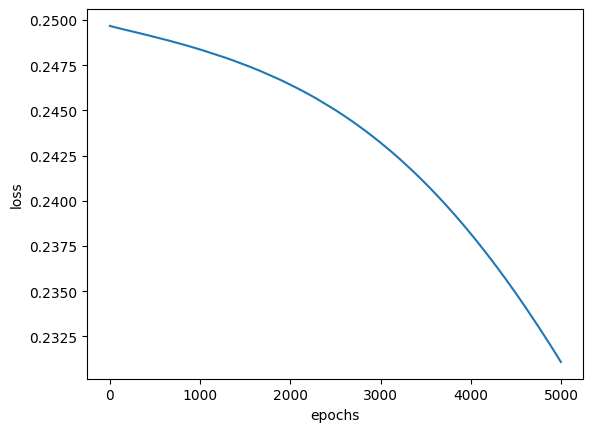

In [ ]:
plt.plot(hist.history['loss'])
plt.ylabel('loss')
plt.xlabel('epochs')
plt.show()

이번에는 분류 문제를 실습해보자.

# iris 데이터

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

우리는 오차를 (실제값 - 예측값) 형식으로 두 차이를 계산을 했는데 분류에서는 오차를 이렇게 계산하면 안된다.

이런 방식이 가능하도록 데이터를 변형시켜주어야하는데 이 때 사용할 수 있는 것이 원 핫 인코딩이다.

In [ ]:
# y label 변형
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(sparse = False, handle_unknown='ignore')
enc.fit(y.reshape(len(y), 1))
enc.categories_

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[array([0, 1, 2])]

In [ ]:
y_onehot = enc.transform(y.reshape(len(y), 1))
y_onehot[:3] # 이런 형태로 변환되었다.

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [ ]:
# 데이터 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=13)

이때 relu는 레이어가 깊어질수록 gradient vanishing 현상이 생기는 sigmoid 함수를 대신하기 위해 사용하는 것이고

다중 클래스 분류 문제에서는 각각의 클래스가 될 확률을 반환해주는 softmax를 사용하는 것이 일반적이다.

In [ ]:
# 모델링
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, input_shape = (4, ), activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [ ]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 32)                160       
                                                                 
 dense_4 (Dense)             (None, 32)                1056      
                                                                 
 dense_5 (Dense)             (None, 32)                1056      
                                                                 
 dense_6 (Dense)             (None, 3)                 99        
                                                                 
Total params: 2371 (9.26 KB)
Trainable params: 2371 (9.26 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
hist = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
4/4 [==============================] - 2s 7ms/step - loss: 1.6576 - accuracy: 0.3417
Epoch 2/100
4/4 [==============================] - 0s 6ms/step - loss: 1.2903 - accuracy: 0.3417
Epoch 3/100
4/4 [==============================] - 0s 6ms/step - loss: 1.1250 - accuracy: 0.2583
Epoch 4/100
4/4 [==============================] - 0s 6ms/step - loss: 1.0771 - accuracy: 0.4833
Epoch 5/100
4/4 [==============================] - 0s 6ms/step - loss: 1.0543 - accuracy: 0.4917
Epoch 6/100
4/4 [==============================] - 0s 5ms/step - loss: 1.0208 - accuracy: 0.4917
Epoch 7/100
4/4 [==============================] - 0s 5ms/step - loss: 0.9855 - accuracy: 0.3250
Epoch 8/100
4/4 [==============================] - 0s 5ms/step - loss: 0.9529 - accuracy: 0.3333
Epoch 9/100
4/4 [==============================] - 0s 6ms/step - loss: 0.9172 - accuracy: 0.4083
Epoch 10/100
4/4 [==============================] - 0s 6ms/step - loss: 0.8811 - accuracy: 0.6667
Epoch 11/100
4/4 [===========

In [ ]:
# 모델 평가
model.evaluate(X_test, y_test, verbose = 2)

1/1 - 0s - loss: 0.0893 - accuracy: 1.0000 - 309ms/epoch - 309ms/step


[0.08931493014097214, 1.0]

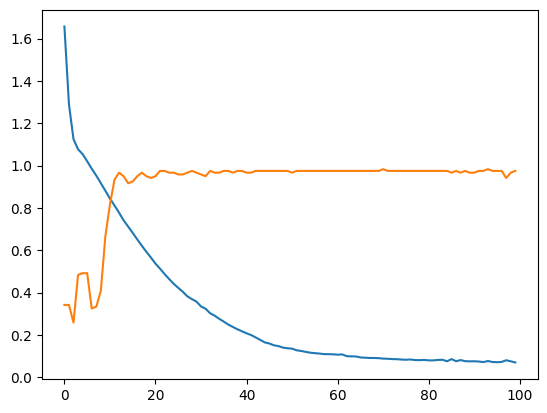

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['accuracy'])

# MNIST

In [ ]:
# 데이터 읽기
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0 , x_test / 255.0
# 각 픽셀은 255가 최대값이여서 이를 나눠줌으로써 0 ~ 1사이의 값으로 조정해주었다.

11490434/11490434 [==============================] - 0s 0us/step


이전 흐름과 비슷하게 간다면 이 또한 다중 분류 문제이므로 y의 값을 원핫 인코딩을 이용해 변환해주어야한다.

이 과정이 귀찮다면(?) 이와 비슷한 기능을 하는 loss function을 이용하면 된다. 이번 실습에서는 이것을 한 번 이용해보자.

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_train[0].shape

(28, 28)

In [ ]:
# 모델링
model = tf.keras.models.Sequential([
    # (28, 28) 픽셀이 input_shape이 된다. 이를 1열로 쫙 펴준다.
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    # 1000개의 노드를 거치자
    tf.keras.layers.Dense(1000, activation='relu'),
    # 0 ~ 9사이의 클래스 중 어디에 속할지 확인
    tf.keras.layers.Dense(10, activation='softmax'),
])

model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_7 (Dense)             (None, 1000)              785000    
                                                                 
 dense_8 (Dense)             (None, 10)                10010     
                                                                 
Total params: 795010 (3.03 MB)
Trainable params: 795010 (3.03 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=100, verbose=1)

Epoch 1/10
600/600 [==============================] - 15s 24ms/step - loss: 0.2236 - accuracy: 0.9344 - val_loss: 0.1021 - val_accuracy: 0.9697
Epoch 2/10
600/600 [==============================] - 9s 16ms/step - loss: 0.0854 - accuracy: 0.9748 - val_loss: 0.0759 - val_accuracy: 0.9766
Epoch 3/10
600/600 [==============================] - 10s 16ms/step - loss: 0.0523 - accuracy: 0.9844 - val_loss: 0.0670 - val_accuracy: 0.9787
Epoch 4/10
600/600 [==============================] - 10s 17ms/step - loss: 0.0360 - accuracy: 0.9891 - val_loss: 0.0707 - val_accuracy: 0.9768
Epoch 5/10
600/600 [==============================] - 10s 16ms/step - loss: 0.0252 - accuracy: 0.9923 - val_loss: 0.0675 - val_accuracy: 0.9796
Epoch 6/10
600/600 [==============================] - 9s 15ms/step - loss: 0.0185 - accuracy: 0.9940 - val_loss: 0.0599 - val_accuracy: 0.9819
Epoch 7/10
600/600 [==============================] - 10s 17ms/step - loss: 0.0131 - accuracy: 0.9962 - val_loss: 0.0596 - val_accuracy: 0

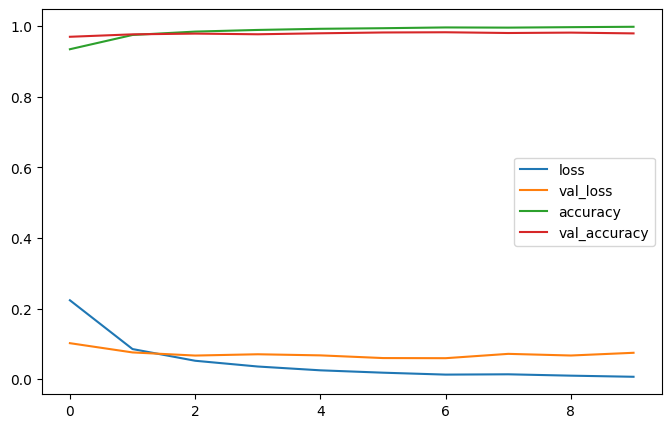

In [ ]:
plot_target = ['loss', 'val_loss', 'accuracy', 'val_accuracy'] # accuracy : 훈련 정확도 , val_accuracy : 검증 정확도
plt.figure(figsize = (8, 5))

for each in plot_target:
    plt.plot(hist.history[each], label = each)
plt.legend()

In [ ]:
score = model.evaluate(x_test, y_test)
print('Test loss : ', score[0])
print('Test accuracy : ', score[1])

313/313 [==============================] - 3s 7ms/step - loss: 0.0749 - accuracy: 0.9793
Test loss :  0.07488106191158295
Test accuracy :  0.9793000221252441


머신러닝에서 93% 쯤 나왔던 결과에 비해 5%정도 상승하였다

In [ ]:
# 그래서 이 모델이 어떻게 쓰이는데?
predicted_result = model.predict(x_test)
predicted_result[0] # 첫번째 데이터에 대한 predict 값

313/313 [==============================] - 2s 6ms/step


array([7.9873209e-12, 1.3240742e-12, 1.7231075e-09, 1.7876779e-07,
       4.3436331e-16, 1.2919184e-11, 1.7925316e-16, 9.9999982e-01,
       1.4223829e-10, 1.6334378e-10], dtype=float32)

In [ ]:
predicted_result[0].max()

0.9999998

In [ ]:
predicted_result[0].argmax() # 해당 데이터는 7 # 가장 큰 원소의 인덱스값 반환

7

In [ ]:
# 이를 한번에 사용하려면 아래와 같이
predicted_label = np.argmax(predicted_result, axis = 1)
predicted_label

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
# 실제 데이터는 아래와 같음
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [ ]:
# 예측이 틀린 것들을 한 번 살펴보자
wrong_result = []
for n in range(0, len(y_test)):
    if predicted_label[n] != y_test[n]:
        wrong_result.append(n) # 틀린 인덱스
len(wrong_result) # 틀린 값들 개수

207

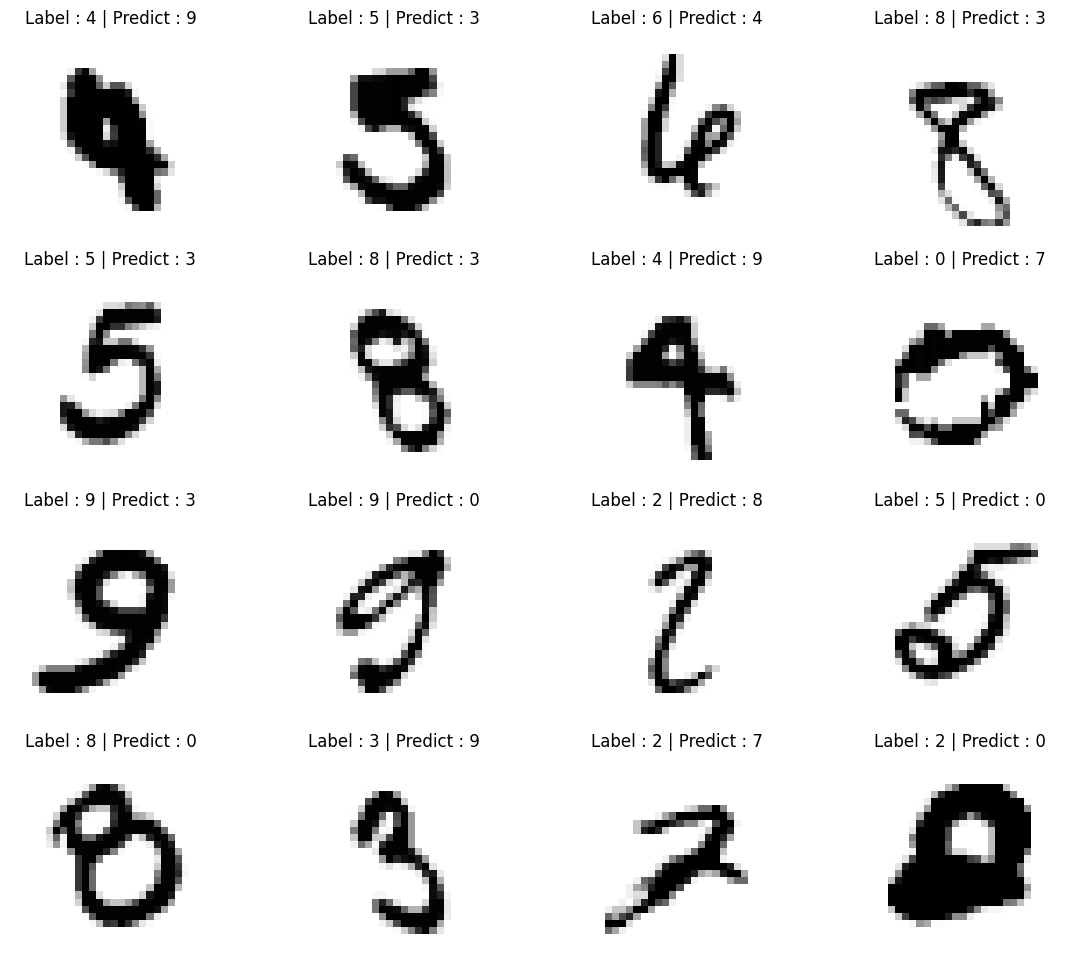

In [ ]:
import random
samples = random.choices(population=wrong_result, k = 16) # 틀린 것들 중 랜덤으로 몇 개만 살펴보자.

plt.figure(figsize=(14, 12))
for idx, n in enumerate(samples):
    plt.subplot(4, 4, idx+1)
    plt.imshow(x_test[n].reshape(28, 28) , cmap = 'Greys')
    plt.title('Label : ' + str(y_test[n]) + ' | Predict : ' + str(predicted_label[n]))
    plt.axis('off')
plt.show()

# MNIST Fashion

In [ ]:
# 데이터 읽기
# 패션과 관련된 10개 종류의 데이터
fashion_mnist = tf.keras.datasets.fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train, X_test = X_train / 255.0 , X_test / 255.0

4422102/4422102 [==============================] - 0s 0us/step


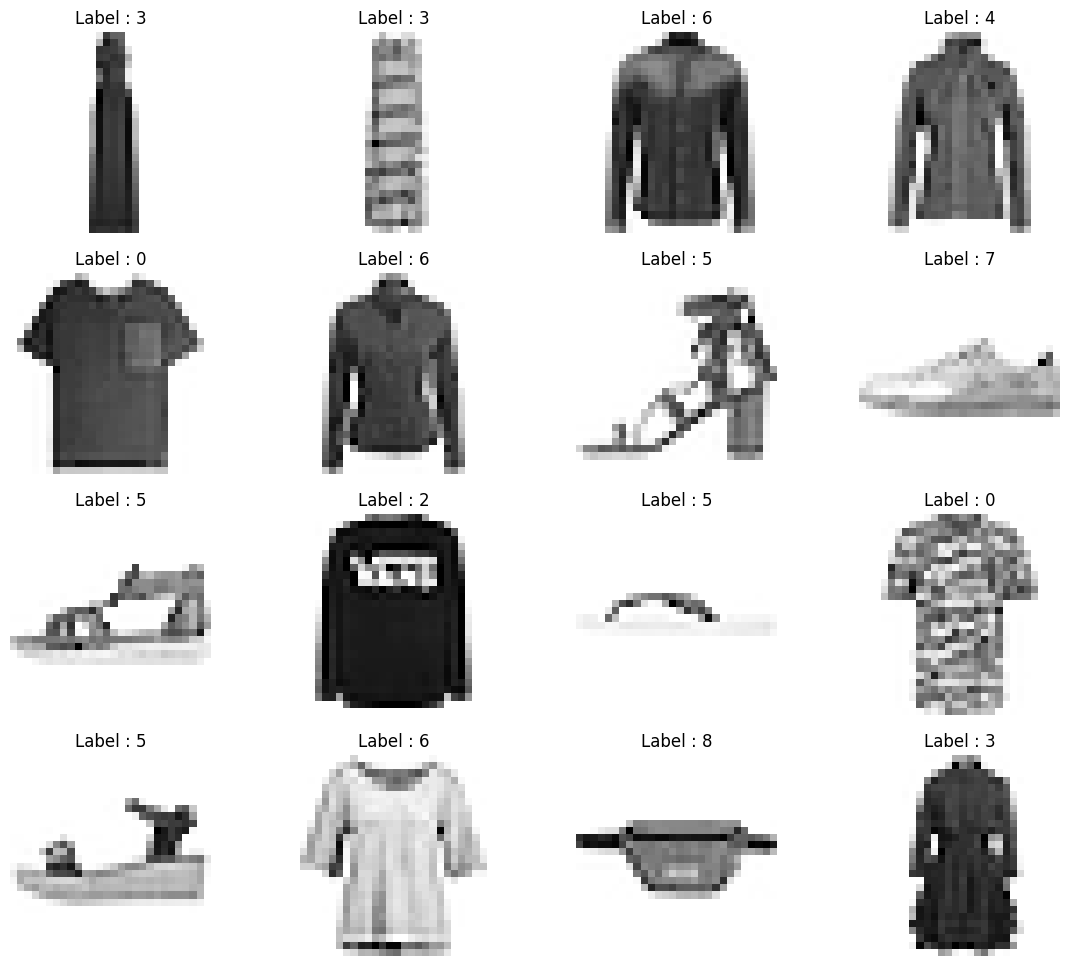

In [ ]:
# 데이터가 어떻게 생겼는지 확인해보자.
import random
samples = random.choices(population=range(0, len(y_train)), k = 16)

plt.figure(figsize=(14, 12))
for idx, n in enumerate(samples):
    plt.subplot(4, 4, idx+1)
    plt.imshow(X_train[n].reshape(28, 28) , cmap = 'Greys')
    plt.title('Label : ' + str(y_train[n]))
    plt.axis('off')
plt.show()

In [ ]:
# 모델링
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
])

model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy']) #  metrics = 척도

hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=100, verbose=1)

Epoch 1/10
600/600 [==============================] - 16s 22ms/step - loss: 0.4852 - accuracy: 0.8285 - val_loss: 0.4246 - val_accuracy: 0.8485
Epoch 2/10
600/600 [==============================] - 10s 17ms/step - loss: 0.3607 - accuracy: 0.8691 - val_loss: 0.3858 - val_accuracy: 0.8604
Epoch 3/10
600/600 [==============================] - 11s 18ms/step - loss: 0.3224 - accuracy: 0.8818 - val_loss: 0.3477 - val_accuracy: 0.8760
Epoch 4/10
600/600 [==============================] - 10s 17ms/step - loss: 0.2995 - accuracy: 0.8899 - val_loss: 0.3646 - val_accuracy: 0.8676
Epoch 5/10
600/600 [==============================] - 10s 16ms/step - loss: 0.2782 - accuracy: 0.8971 - val_loss: 0.3472 - val_accuracy: 0.8788
Epoch 6/10
600/600 [==============================] - 10s 16ms/step - loss: 0.2609 - accuracy: 0.9030 - val_loss: 0.3561 - val_accuracy: 0.8734
Epoch 7/10
600/600 [==============================] - 9s 15ms/step - loss: 0.2526 - accuracy: 0.9065 - val_loss: 0.3434 - val_accuracy: 

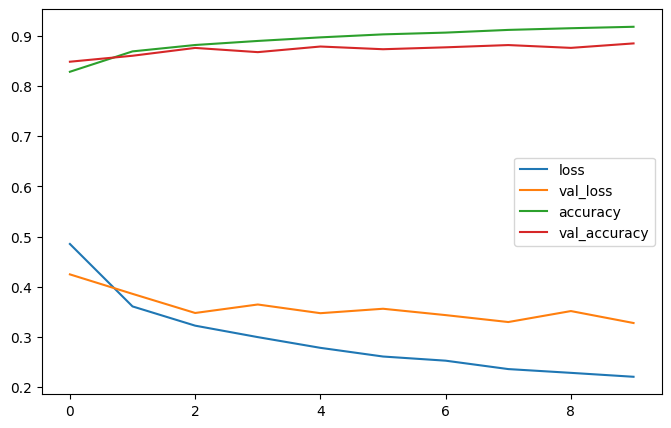

In [ ]:
plot_target = ['loss', 'val_loss', 'accuracy', 'val_accuracy']
plt.figure(figsize = (8, 5))

for each in plot_target:
    plt.plot(hist.history[each], label = each)
plt.legend()

loss function이 상승하기 전이 좋은 구간 :)

In [ ]:
score = model.evaluate(X_test, y_test)
print('Test loss : ', score[0])
print('Test accuracy : ', score[1])

313/313 [==============================] - 4s 9ms/step - loss: 0.3276 - accuracy: 0.8850
Test loss :  0.32764771580696106
Test accuracy :  0.8849999904632568


# CNN

사진의 특징을 검출하는 레이어가 있다

In [ ]:
mnist = tf.keras.datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train / 255.0 , X_test / 255.0

X_train.shape, X_test.shape

11490434/11490434 [==============================] - 0s 0us/step


((60000, 28, 28), (10000, 28, 28))

In [ ]:
# channel이 들어가므로 해당 차원과 맞춰주기 위한 reshape
X_train = X_train.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1))

In [ ]:
# 모델링
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, kernel_size = (5, 5), strides = (1, 1), padding = 'same', activation = 'relu',
                  input_shape = (28, 28, 1)),
    layers.MaxPool2D(pool_size = (2, 2), strides = (2, 2)),
    layers.Conv2D(64, (2, 2), activation = 'relu', padding = 'same'),
    layers.MaxPool2D(pool_size = (2, 2), strides = (2, 2)),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(1000, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')

])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        8256      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 7, 7, 64)          0         
                                                                 
 flatten (Flatten)           (None, 3136)              0

In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

hist = model.fit(X_train, y_train, epochs=5, verbose = 1, validation_data=(X_test, y_test))

Epoch 1/5
1875/1875 [==============================] - 167s 88ms/step - loss: 0.1122 - accuracy: 0.9650 - val_loss: 0.0364 - val_accuracy: 0.9886
Epoch 2/5
1875/1875 [==============================] - 143s 76ms/step - loss: 0.0450 - accuracy: 0.9858 - val_loss: 0.0271 - val_accuracy: 0.9915
Epoch 3/5
1875/1875 [==============================] - 147s 79ms/step - loss: 0.0344 - accuracy: 0.9890 - val_loss: 0.0310 - val_accuracy: 0.9908
Epoch 4/5
1875/1875 [==============================] - 140s 75ms/step - loss: 0.0263 - accuracy: 0.9917 - val_loss: 0.0302 - val_accuracy: 0.9908
Epoch 5/5
1875/1875 [==============================] - 142s 76ms/step - loss: 0.0197 - accuracy: 0.9934 - val_loss: 0.0293 - val_accuracy: 0.9922


In [ ]:
score = model.evaluate(X_test, y_test)
print('Test loss : ', score[0])
print('Test accuracy : ', score[1])

313/313 [==============================] - 6s 20ms/step - loss: 0.0293 - accuracy: 0.9922
Test loss :  0.029269838705658913
Test accuracy :  0.9922000169754028


In [ ]:
predicted_result = model.predict(X_test)
predicted_label = np.argmax(predicted_result, axis = 1)

wrong_result = []
for n in range(0, len(y_test)):
    if predicted_label[n] != y_test[n]:
        wrong_result.append(n) # 틀린 인덱스
len(wrong_result) # 틀린 값들 개수

313/313 [==============================] - 7s 22ms/step


78

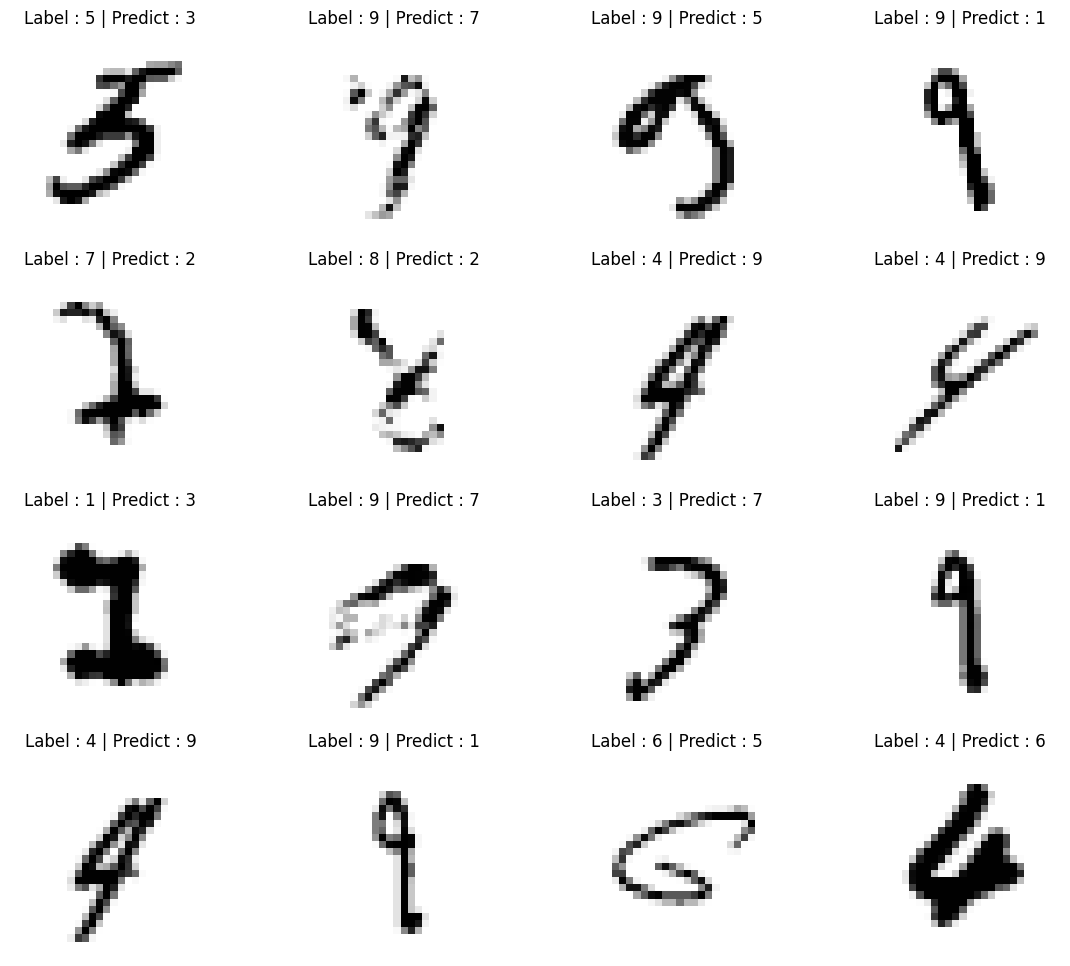

In [ ]:
import random
samples = random.choices(population=wrong_result, k = 16) # 틀린 것들 중 랜덤으로 몇 개만 살펴보자.

plt.figure(figsize=(14, 12))
for idx, n in enumerate(samples):
    plt.subplot(4, 4, idx+1)
    plt.imshow(X_test[n].reshape(28, 28) , cmap = 'Greys')
    plt.title('Label : ' + str(y_test[n]) + ' | Predict : ' + str(predicted_label[n]))
    plt.axis('off')
plt.show()